<center>
<b>
<font size=6>
Abstract Cloud:<br>
</font>
</b>

<font size=4>
Search PubMed for abstracts with a given author name and make a wordcloud from abstracts' text
</font>

</center>

In [ ]:
# install packages (if necessary)
install.packages(c("RISmed","tm","SnowballC","wordcloud2","webshots","htmlwidgets","IRdisplay"),
                 repos="https://cran.rstudio.com/")
webshot::install_phantomjs()

In [2]:
# pubmed search
library(RISmed)

# text mining
library(tm)
library(SnowballC)

# wordcloud generation
library(wordcloud2)

# figure save and display
library(webshot)
library(htmlwidgets)
library(IRdisplay)

# Code put together by Murat Bilgel from:
# http://www.sthda.com/english/wiki/text-mining-and-word-cloud-fundamentals-in-r-5-simple-steps-you-should-know
# https://cran.r-project.org/web/packages/wordcloud2/vignettes/wordcloud.html
# https://www.r-graph-gallery.com/196-the-wordcloud2-library/

Warning message:
“package ‘tm’ was built under R version 3.4.3”Loading required package: NLP
Warning message:
“package ‘webshot’ was built under R version 3.4.3”

In [3]:
# PubMed query
my_query <- "Murat Bilgel[AU]"

In [4]:
# get pubmed data
search_query <- EUtilsSummary(my_query)
records<- EUtilsGet(search_query)
pubmed_data <- data.frame('Title'=ArticleTitle(records),'Abstract'=AbstractText(records))
head(pubmed_data,1) # take a look at the first result

Title,Abstract
Temporal Order of Alzheimer's Disease-Related Cognitive Marker Changes in BLSA and WRAP Longitudinal Studies.,"Investigation of the temporal trajectories of currently used neuropsychological tests is critical to identifying earliest changing measures on the path to dementia due to Alzheimer's disease (AD). We used the Progression Score (PS) method to characterize the temporal trajectories of measures of verbal memory, executive function, attention, processing speed, language, and mental status using data spanning normal cognition, mild cognitive impairment, and AD from 1,661 participants with a total of 7,839 visits (age at last visit 77.6 SD 9.2) in the Baltimore Longitudinal Study of Aging (BLSA) and 1510 participants with a total of 3,473 visits (age at last visit 59.5 SD 7.4) in the Wisconsin Registry for Alzheimer's Prevention (WRAP). This method aligns individuals in time based on the similarity of their longitudinal measurements to reveal temporal trajectories. As a validation of our methodology, we explored the associations between the individualized cognitive progression scores (Cog-PS) computed by our method and clinical diagnosis. Digit span tests were the first to show declines in both data sets, and were detected mainly among cognitively normal individuals. These were followed by tests of verbal memory, which were in turn followed by Trail Making Tests, Boston Naming Test, and Mini-Mental State Examination. Differences in Cog-PS across the clinical diagnosis and APOEɛ4 groups were statistically significant, highlighting the potential use of Cog-PS as individualized indicators of disease progression. Identifying cognitive measures that are changing in preclinical AD can lead to the development of novel cognitive tests that are finely tuned to detecting earliest changes."


In [5]:
# get abstract body only
docs <- Corpus(VectorSource(pubmed_data$Abstract))

In [6]:
inspect(docs) # take a look at the results

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 19

 [1] Investigation of the temporal trajectories of currently used neuropsychological tests is critical to identifying earliest changing measures on the path to dementia due to Alzheimer's disease (AD). We used the Progression Score (PS) method to characterize the temporal trajectories of measures of verbal memory, executive function, attention, processing speed, language, and mental status using data spanning normal cognition, mild cognitive impairment, and AD from 1,661 participants with a total of 7,839 visits (age at last visit 77.6 SD 9.2) in the Baltimore Longitudinal Study of Aging (BLSA) and 1510 participants with a total of 3,473 visits (age at last visit 59.5 SD 7.4) in the Wisconsin Registry for Alzheimer's Prevention (WRAP). This method aligns individuals in time based on the similarity of their longitudinal measurements to reveal temporal trajectories. As a validation of our

In [7]:
# get rid of unnecessary characters in text
toSpace <- content_transformer(function (x , pattern ) gsub(pattern, " ", x))
docs <- tm_map(docs, toSpace, "/")
docs <- tm_map(docs, toSpace, "@")
docs <- tm_map(docs, toSpace, "\\|")

In [8]:
# Convert the text to lower case
docs <- tm_map(docs, content_transformer(tolower))
# Remove numbers
docs <- tm_map(docs, removeNumbers)
# Remove english common stopwords (is, are, was, at, some, ...)
docs <- tm_map(docs, removeWords, stopwords("english"))
# Remove additional words
docs <- tm_map(docs, removeWords, c("abstract","objective","purpose","introduction","background",
                                    "method","methods","material","materials",
                                    "discussion","conclusion","conclusions",
                                    "reference","references","bibliography",
                                    "however")) 
# Remove punctuations
docs <- tm_map(docs, removePunctuation)
# Eliminate extra white spaces
docs <- tm_map(docs, stripWhitespace)
# Text stemming (i.e., get rid of suffixes)
# docs <- tm_map(docs, stemDocument)

In [9]:
# generate word frequency table
dtm <- TermDocumentMatrix(docs)
m <- as.matrix(dtm)
v <- sort(rowSums(m),decreasing=TRUE)
d <- data.frame(word = names(v),freq=v)
head(d, 20) # look at top 20 words

,word,freq
aβ,aβ,46
age,age,40
disease,disease,38
longitudinal,longitudinal,30
using,using,27
associated,associated,25
risk,risk,25
pet,pet,25
mean,mean,23
images,images,22


In [10]:
# plot wordcloud
# due to lack of htmlwidget support in jupyter notebook, we cannot display this directly here. 
# We'll first save it as an interactive HTML, then export as png.
mywordcloud = wordcloud2(d, size=1.6, color='random-dark')

In [11]:
saveWidget(mywordcloud, "mywordcloud.html", selfcontained = F)

In [12]:
# a longer delay might be necessary to capture more words
webshot("mywordcloud.html","mywordcloud.png", delay=60, vwidth=1000, vheight=1000)

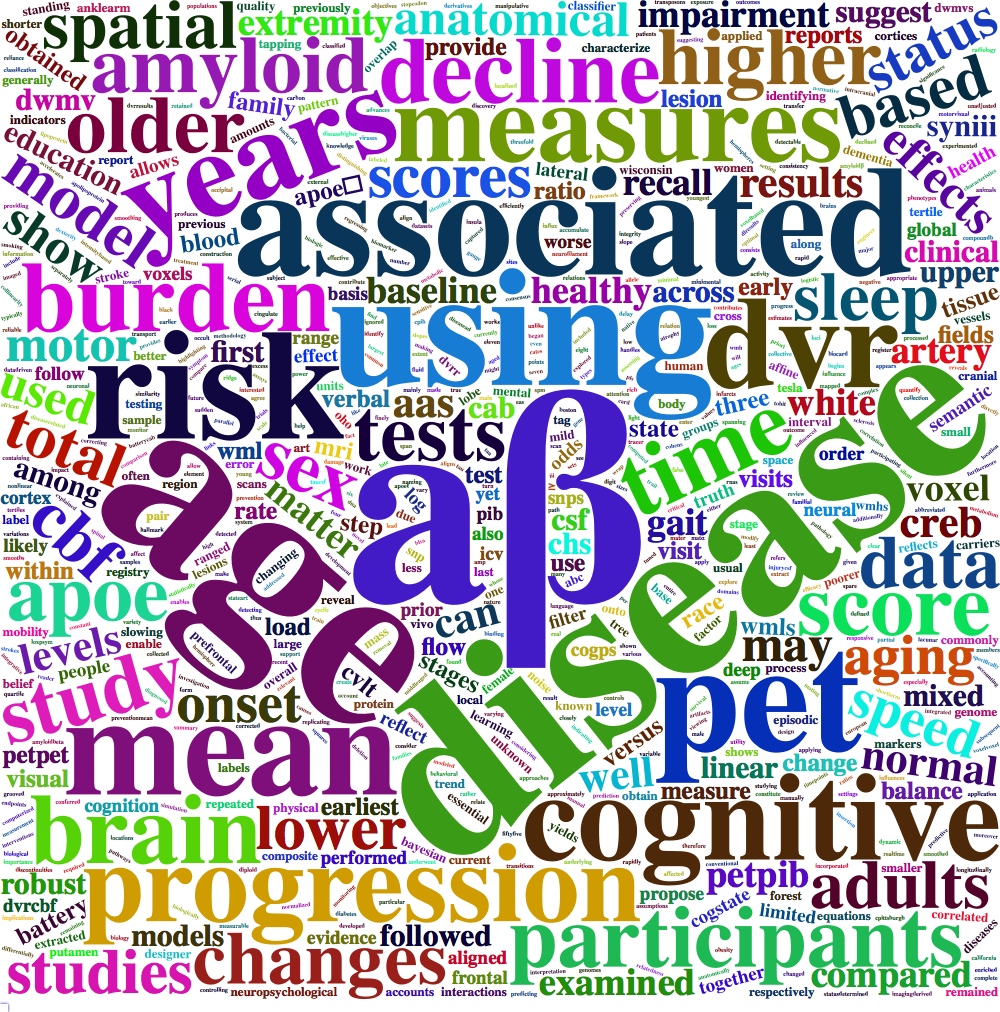

In [13]:
display_png(file="mywordcloud.png")